In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
import cython
import sys
import time
%load_ext cython


In [2]:
start_time = time.clock()
dataset='dataset'
folders=os.listdir(dataset)
N=0
for folder in folders:
    N+=len(os.listdir(dataset+'/'+str(folder)))
pairs=0
for folder in folders:
    l=len(os.listdir(dataset+'/'+str(folder)))
    pairs+=l**2+l*(N-l)

In [ ]:
pairs


In [ ]:
N

In [3]:
#
# excequiting time - 116 seconds,  21.5 GiB jf memory
#

start_time = time.clock()
#def create_pairs(main_folder_name):
'''Positive and negative pair creation.
 '''
main_folder_name='dataset'
max_positive_pairs_count=108067
max_negative_pairs_count=120000

pairs_len=max_positive_pairs_count+max_negative_pairs_count
pairs = np.zeros((pairs_len,2,128,128,3),dtype='uint8')
labels = []

folders=os.listdir(main_folder_name)
positive_counter=0

#
# creating positive pairs sum Li**2 pairs 
#
for folder in folders:
    images_names=(os.listdir(main_folder_name+'/'folder))
    for kernel_name in images_names:
        for secondary_name in images_names:
            kernel_image=imread(main_folder_name+'/'+folder+'/'+kernel_name)
            second_image=imread(main_folder_name+'/'+folder+'/'+secondary_name)
            pairs[positive_counter]=[kernel_image,second_image]
            labels.append([1])
            positive_counter+=1
#
# creating negative pairs
#
negative_counter=positive_counter

for i in range(max_negative_pairs_count): 
    first_folder=np.random.choice(folders)
    second_folder=np.random.choice(folders)
    #
    # if folders are the same
    #
    while first_folder==second_folder:
        first_folder=np.random.choice(folders)
        second_folder=np.random.choice(folders)

    first_folder_images=os.listdir(main_folder_name+'/'+first_folder)
    second_folder_images=os.listdir(main_folder_name+'/'+second_folder)

    first_image_name=np.random.choice(first_folder_images)
    second_image_name=np.random.choice(second_folder_images)
    
    first_image=imread(main_folder_name+'/'+first_folder+'/'+first_image_name)
    second_image=imread(main_folder_name+'/'+second_folder+'/'+second_image_name)
    
    pairs[negative_counter]=[first_image,second_image]
    labels.append([0])
    negative_counter+=1
print(time.clock()-start_time)

116.37365553701294


In [7]:
pairs.shape

(228067, 2, 128, 128, 3)

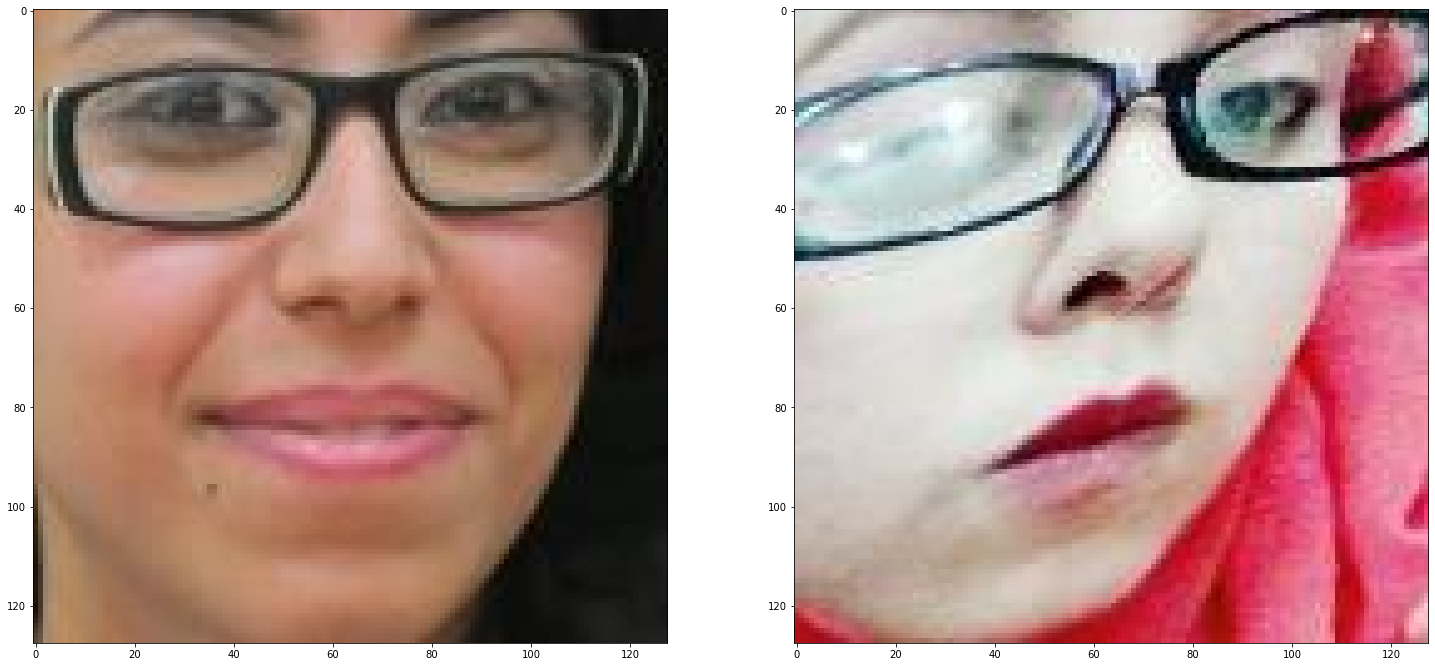

In [16]:
N=180000
size=25

fig, (ax1, ax2) = plt.subplots(
nrows=1, ncols=2,
figsize=(size,size)
)
ax1.imshow(pairs[N][0])
ax2.imshow(pairs[N][1])

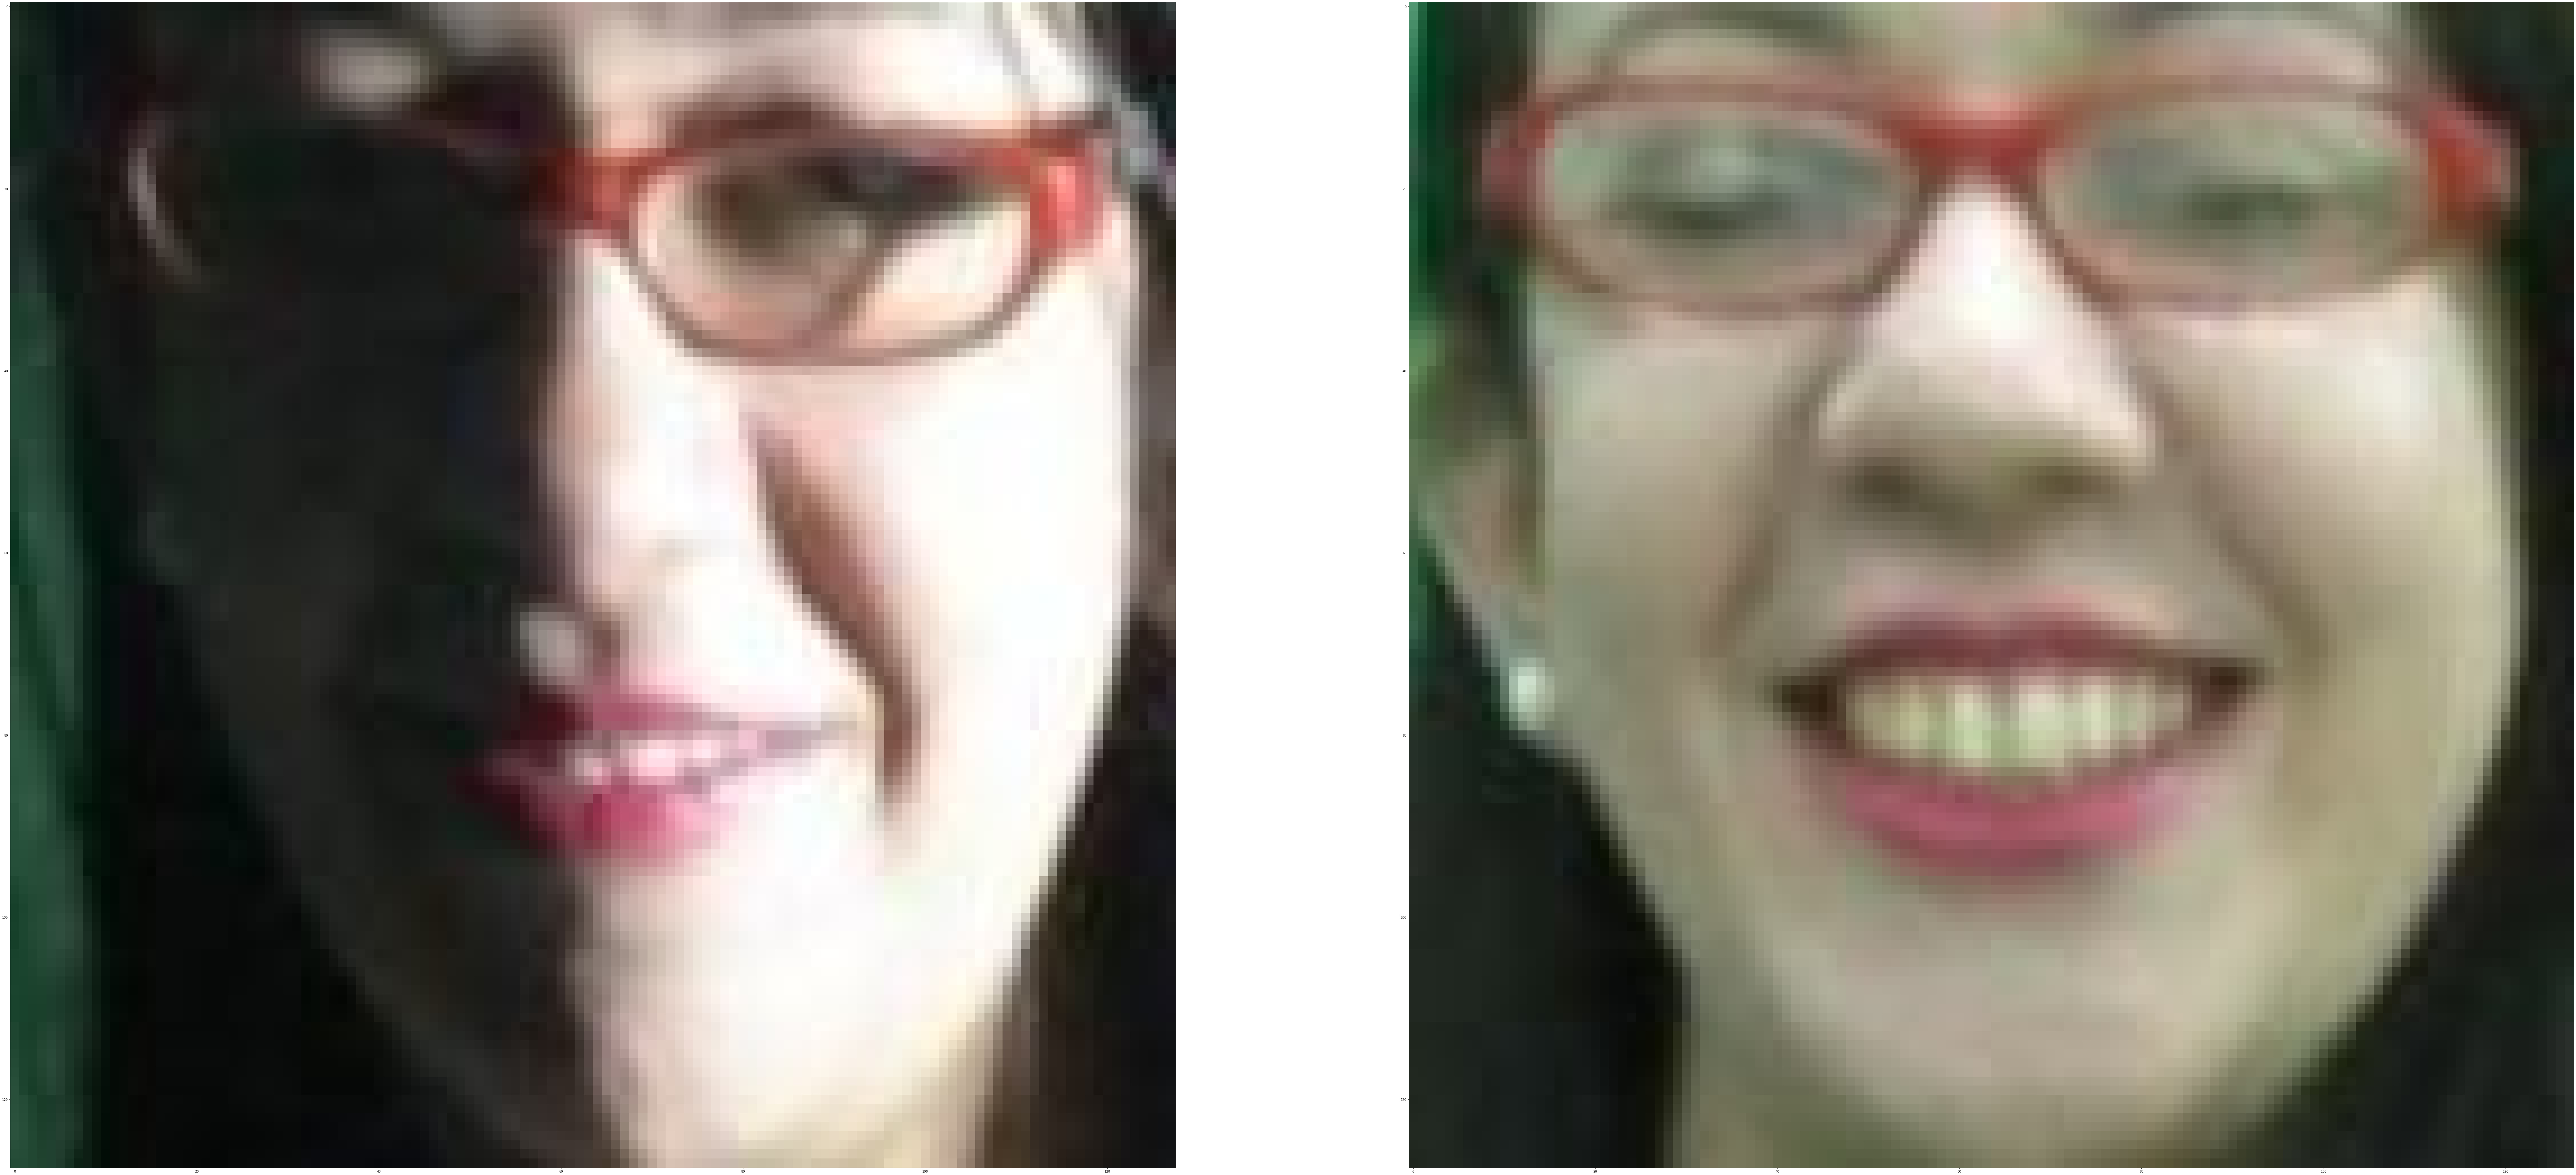

In [12]:
N=100000

fig, (ax1, ax2) = plt.subplots(
nrows=1, ncols=2,
figsize=(150,150)
)
ax1.imshow(pairs[N][0])
ax2.imshow(pairs[N][1])